## 'Straight Outta Compton' Is The Rare Biopic Not About White Dudes

This project uses the `biopics` dataset from FiveThirtyEight, a now defunct off-shoot of ABC news which was historically known for producing football analysis statistics as well as other analysis-related journalism. By making use of this dataset, it aims to recreate the analysis done in the article "'Straight Outta Compton' Is The Rare Biopic Not About White Dudes", one of the few articles written by FiveThirtyEight still available online. 

In [2]:
import pandas as pd 
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
biopics = pd.read_csv('biopics.csv')

biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Known,White,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Known,White,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Known,White,0,Male,Myles Berkowitz


The goals of this project are as follows:
* Clean the dataset as appropriate for the goals below
* Establish the number of (and therefore percentage of) biopics that are about women.
* Establish the number of biopics that are about white people
* Recreate the stacked bar chart that visualised the distribution of race in biopics
* Find out the number of biopics about women of colour
* Recreate the stacked bar chart that visualised the gender distribution in biopics
* Find out the distribution of jobs of the women and people of colour portrayed in the biopics

### Task 1
In order to establish the number of biopics that are about women, first we have to check if any of the rows are missing a value in the `subject_sex` column. This can be done by passing the `isna()` and `value_counts()` functions on the column.

In [10]:
biopics.subject_sex.isna().value_counts()

subject_sex
False    761
Name: count, dtype: int64

As there are no missing values, we can find the number of biopics about women by using the `value_counts()` function, and the percentage of films about women by passing `normalize = True` as a parameter to that function and multiplying the output by 100. The output indicates that 177 of the films in the dataset are about women, totalling to 23.26%.

In [13]:
print(biopics.subject_sex.value_counts())
print(biopics.subject_sex.value_counts(normalize = True) * 100)

subject_sex
Male      584
Female    177
Name: count, dtype: int64
subject_sex
Male      76.74113
Female    23.25887
Name: proportion, dtype: float64


### Task 2
Finding the number of biopics that are about white people (or conversely, the number of biopics about people of colour) can be done in a very similar way. Firstly, find the number of rows where the race of the subject is unknown:

In [7]:
biopics.loc[biopics['race_known'] == "Unknown"]

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
15,A Home of Our Own,http://www.imdb.com/title/tt0107130/,US,1993,$1.7M,Tony Bill,1,Frances Lacey,Other,Unknown,NaN,0,Female,Kathy Bates
69,Beyond the Law,http://www.imdb.com/title/tt0103805/,US,1993,-,Larry Ferguson,1,Dan Black,Other,Unknown,NaN,0,Male,Charlie Sheen
127,Chattahoochee,http://www.imdb.com/title/tt0099242/,US,1989,$259K,Mick Jackson,1,Emmett Foley,Military,Unknown,NaN,0,Male,Gary Oldman
194,Everyman's War,http://www.imdb.com/title/tt1209319/,US,2009,-,Thad T. Smith,1,Don Smith,Military,Unknown,NaN,0,Male,Cole Carson
293,Jamesy Boy,http://www.imdb.com/title/tt1673734/,US,2014,-,Trevor White,1,James Burns,Criminal,Unknown,NaN,0,Male,Spencer Lofranco
497,Spartacus,http://www.imdb.com/title/tt0054331/,US,1960,-,Stanley Kubrick,1,Spartacus,Historical,Unknown,NaN,0,Male,Kirk Douglas
566,The Entity,http://www.imdb.com/title/tt0082334/,US,1982,-,Sidney J. Furie,1,Doris Bither,Other,Unknown,NaN,0,Female,Barbara Hershey


It's important to note that in the original dataset, the number of rows where this is true is a lot larger, however I have already gone through the dataset and filled in this information if the data was freely available (there is one thing I hate more than inaccessible data visualisations, and that is missing data). This leaves us with just 7 films where the race of the subject is unknown, and therefore `subject_race` is a missing value - this is a fairly manageable number so no further action is really needed in data cleaning.

To get more detailed findings, we could use `.value_counts()` on the `subject_sex` column, however to find out the number of films about white people vs people of colour, we can use `.value_counts()` on `person_of_color`, which encodes each subject as 0 or 1, where 1 indicates a person of colour. These encodings are taken from the original dataset, in which 0 encompasses white, Hispanic (white), Middle Eastern (white), some multiracial subjects depending on background and Hispanic (Latin American). It is important to note that films where the subject's race is unknown are still classified as 0 in the `person_of_color` column.

In [18]:
print(biopics.person_of_color.value_counts())

person_of_color
0    659
1    102
Name: count, dtype: int64


In [17]:
print(biopics.person_of_color.value_counts(normalize = True) * 100)

person_of_color
0    86.596583
1    13.403417
Name: proportion, dtype: float64


This output indicates that 659 of the 761 subjects in the films represented in the dataset were white, making up 86.6% of the dataset. 102 of subjects were people of colour, making up 13.4% of the dataset.

### Task 3
To recreate the first figure found in the article, an aggregated dataset was made, which calculates the number of films that have either white subjects or non-white subjects for each year using the `.value_counts()` function, grouped by `year_release`. Aggregating this data in a new dataframe makes it much easier to create a stacked bar chart, which is done using the `matplotlib.pyplot` function `.bar()`.

In [35]:
agg_data = biopics.groupby(['year_release', 'person_of_color'])['person_of_color'].value_counts().unstack().fillna(0)
agg_data

person_of_color,0,1
year_release,,
1915,1.0,0.0
1927,1.0,0.0
1929,1.0,0.0
1930,1.0,0.0
1933,2.0,0.0
...,...,...
2010,20.0,3.0
2011,11.0,2.0
2012,13.0,0.0


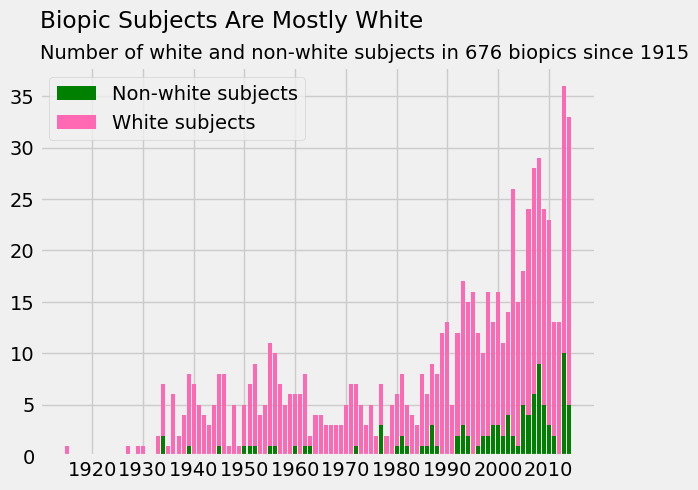

In [83]:
fig, ax = plt.subplots()
pt1 = ax.bar(x = agg_data.index, height = agg_data.iloc[:, 1], label = "Non-white subjects", color = "green")
pt2 = ax.bar(x = agg_data.index, height = agg_data.iloc[:, 0], bottom = agg_data.iloc[:, 1], label = "White subjects", color = "hotpink")
plt.style.use("fivethirtyeight")
ax.legend(handles = [pt1, pt2])
ax.set_xticks((1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010))
plt.suptitle("Biopic Subjects Are Mostly White", x = 0.38, y = 1)
ax.set_title("Number of white and non-white subjects in 676 biopics since 1915", loc = "left", fontsize = 14)
plt.show()

The additional lines of code used to create the bar chart are majorly aesthetic, which make the bar chart more similar to the chart in the article.

### Task 4
To find the number of films where the subject was a woman of colour, the code below returns a list of all of the rows in the dataset where the `person_of_color` column is equal to 1 (i.e. the subject has been identified as a person of colour), and where `subject_sex` is equal to Female. The `len` function then finds the length of this list - removing `len` from the start of this code will instead return the list of these rows.

In [89]:
len(biopics.loc[(biopics['person_of_color'] == 1) & (biopics['subject_sex'] == "Female")])

21

In [90]:
biopics.loc[(biopics['person_of_color'] == 1) & (biopics['subject_sex'] == "Female")]

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
21,A Mighty Heart,http://www.imdb.com/title/tt0829459/,US/UK,2007,$9.17M,Michael Winterbottom,2,Mariane Pearl,Journalist,Known,Multi racial,1,Female,Angelina Jolie
55,Bandit Queen,http://www.imdb.com/title/tt0109206/,UK,1994,$400K,Shekhar Kapur,1,Phoolan Devi,Criminal,Known,Indian,1,Female,Seema Biswas
102,Cadillac Records,http://www.imdb.com/title/tt1042877/,US,2008,$8.13M,Darnell Martin,3,Etta James,Singer,Known,African American,1,Female,Beyonce Knowles
106,Caesar and Cleopatra,http://www.imdb.com/title/tt0038390/,UK,1945,-,Gabriel Pascal,2,Cleopatra,Historical,Known,Middle Eastern,1,Female,Vivien Leigh
135,Cleopatra,http://www.imdb.com/title/tt0024991/,US,1934,-,Cecil B. DeMille,1,Cleopatra,Historical,Known,Middle Eastern,1,Female,Claudette Colbert
136,Cleopatra,http://www.imdb.com/title/tt0056937/,US/UK,1963,$57.8M,Joseph L. Mankiewicz,1,Cleopatra,Historical,Known,Middle Eastern,1,Female,Elizabeth Taylor
137,Coal Miner's Daughter,http://www.imdb.com/title/tt0080549/,US,1980,$79.9M,Michael Apted,1,Loretta Lynn,Singer,Known,Multi racial,1,Female,Sissy Spacek
161,Desert Flower,http://www.imdb.com/title/tt1054580/,UK,2009,$44.3K,Sherry Hormann,1,Waris Dirie,Activist,Known,African,1,Female,Soraya Omar-Scego (young) and Liya Kebede (older)
213,Frankie & Alice,http://www.imdb.com/title/tt1221208/,Canada,2010,$693K,Geoffrey Sax,1,Frankie Murdoch,Other,Known,African American,1,Female,Halle Berry
216,Frida,http://www.imdb.com/title/tt0120679/,US/Canada,2002,$25.8M,Julie Taymor,1,Frida Kahlo,Artist,Known,Hispanic (Latin American),1,Female,Salma Hayek


This indicates that just 21 of the biopics in the dataset are about a woman of colour, which is the same as was found by the article - even with the increased race data in the updated dataset. The article then indicates that three of the films are about Cleopatra (Caesar and Cleopatra, Cleopatra, and Cleopatra), and in all three of those films Cleopatra is played by a white woman. This is surprisingly common - the race of the actor or actress is not in the dataset so without excessive research it is difficult to find, but a known example even within the short list of films about women of colour is 'A Mighty Heart', in which Mariane Pearl, a multiracial woman of majorly Cuban descent, is played by Angelina Jolie.

### Task 5
Recreating the next stacked bar chart is done in a very similar way to the first chart, just using the `subject_sex` column.

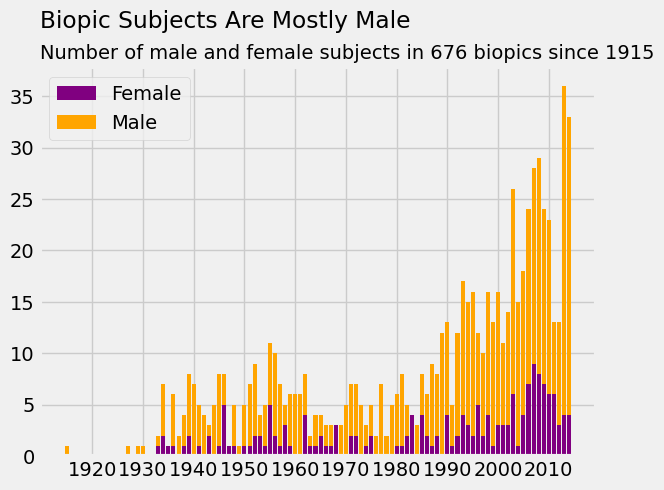

In [93]:
sex_data = biopics.groupby(['year_release', 'subject_sex'])['subject_sex'].value_counts().unstack().fillna(0)
fig, ax = plt.subplots()
pt1 = ax.bar(x = sex_data.index, height = sex_data.Female, label = "Female", color = "purple")
pt2 = ax.bar(x = sex_data.index, height = sex_data.Male, bottom = sex_data.Female, label = "Male", color = "orange")
plt.style.use("fivethirtyeight")
ax.legend(handles = [pt1, pt2])
ax.set_xticks((1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010))
plt.suptitle("Biopic Subjects Are Mostly Male", x = 0.37, y = 1)
ax.set_title("Number of male and female subjects in 676 biopics since 1915", loc = "left", fontsize = 14)
plt.show()

### Task 6
The final part of this analysis is to find the distribution of jobs (`type_of_subject`) for the people of colour (`person_of_color == 1`) and the women (`subject_sex == "Female"`) in the datset.

In [101]:
poc = biopics.loc[biopics["person_of_color"] == 1]
poc.type_of_subject.value_counts()

type_of_subject
Athlete         18
Other           17
Activist        15
Musician        10
Historical       7
Criminal         6
Singer           6
Military         5
Artist           5
World leader     4
Actor            3
Journalist       1
Comedian         1
Author           1
Media            1
Academic         1
Government       1
Name: count, dtype: int64

In [104]:
women = biopics.loc[biopics["subject_sex"] == "Female"]
women.type_of_subject.value_counts()

type_of_subject
Other                 57
Historical            26
Author                16
Actress               15
Singer                10
Athlete                9
Criminal               7
Artist                 7
Musician               7
Activist               6
Academic               4
Author (poet)          3
Government             2
World leader           1
Medicine               1
Military               1
Actress / activist     1
Teacher                1
Journalist             1
Actress                1
Media                  1
Name: count, dtype: int64

In [107]:
women.loc[women["type_of_subject"] == "Other"]

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
15,A Home of Our Own,http://www.imdb.com/title/tt0107130/,US,1993,$1.7M,Tony Bill,1,Frances Lacey,Other,Unknown,NaN,0,Female,Kathy Bates
35,Amelia,http://www.imdb.com/title/tt1129445/,US/Canada,2009,$14.2M,Mira Nair,1,Amelia Earhart,Other,Known,White,0,Female,Hilary Swank
41,An American Crime,http://www.imdb.com/title/tt0802948/,US,2007,-,Tommy O'Haver,2,Sylvia Likens,Other,Known,White,0,Female,Elliot Page
43,Anastasia,http://www.imdb.com/title/tt0048947/,US,1956,-,Anatole Litvak,1,Anna Anderson / Anastasia,Other,Known,White,0,Female,Ingrid Bergman
44,Anna and the King of Siam,http://www.imdb.com/title/tt0038303/,US,1946,-,John Cromwell,1,Anna Leonowens,Other,Known,Multi racial,0,Female,Irene Dunne
67,Bernard and Doris,http://www.imdb.com/title/tt0470732/,US/UK,2006,-,Bob Balaban,2,Doris Duke,Other,Known,White,0,Female,Susan Sarandon
77,Blossoms in the Dust,http://www.imdb.com/title/tt0033407/,US,1941,-,Mervyn LeRoy,1,Edna Gladney,Other,Known,White,0,Female,Greer Garson
92,Bright Star,http://www.imdb.com/title/tt0810784/,UK,2009,$4.44M,Jane Campion,2,Fanny Brawne,Other,Known,White,0,Female,Abbie Cornish
144,Conviction,http://www.imdb.com/title/tt1244754/,US,2010,$6.78M,Tony Goldwyn,1,Betty Anne Waters,Other,Known,White,0,Female,Hilary Swank
156,Dangerous Beauty,http://www.imdb.com/title/tt0118892/,US,1998,$4.53M,Marshall Herskovitz,1,Veronica Franco,Other,Known,White,0,Female,Catherine McCormack


This output indicates that the majority of biopics about people of colour are about athletes or those classified as "Other", some of whom are also athletes but typically fall into more than one of the other categories, or none of the categories. The majority of biopics about women are about those classified as "Other" - many are noblewomen or activists who are also well known for another major category.

One major piece of information clear in these breakdowns which was pointed out by the article is that across these two categories just five films are about World Leaders - a much larger list is produced when including white men.

In [108]:
biopics.loc[biopics["type_of_subject"] == "World leader"]

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
23,Abe Lincoln in Illinois,http://www.imdb.com/title/tt0032181/,US,1940,-,John Cromwell,1,Abraham Lincoln,World leader,Known,White,0,Male,Raymond Massey
25,Abraham Lincoln,http://www.imdb.com/title/tt0020620/,US,1930,-,D.W. Griffith,1,Abraham Lincoln,World leader,Known,White,0,Male,Walter Huston
174,Disraeli,http://www.imdb.com/title/tt0019823/,US,1929,-,Alfred E. Green,1,Benjamin Disraeli,World leader,Known,White,0,Male,George Arliss
265,Hyde Park on Hudson,http://www.imdb.com/title/tt1477855/,UK,2012,$6.37M,Roger Michell,2,Franklin Delano Roosevelt,World leader,Known,White,0,Male,Bill Murray
285,Invictus,http://www.imdb.com/title/tt1057500/,US,2009,$37.5M,Clint Eastwood,2,Nelson Mandela,World leader,Known,African,1,Male,Morgan Freeman
309,Juarez,http://www.imdb.com/title/tt0031516/,US,1939,-,William Dieterle,1,Benito Juarez,World leader,Known,Hispanic (Latin American),1,Male,Paul Muni
332,Lincoln,http://www.imdb.com/title/tt0443272/,US,2012,$182M,Steven Spielberg,1,Abraham Lincoln,World leader,Known,White,0,Male,Daniel Day-Lewis
360,Mandela: Long Walk to Freedom,http://www.imdb.com/title/tt2304771/,UK,2013,$8.32M,Justin Chadwick,1,Nelson Mandela,World leader,Known,African,1,Male,Idris Elba
405,Nixon,http://www.imdb.com/title/tt0113987/,US,1995,$13.6M,Oliver Stone,1,Richard Milhous Nixon,World leader,Known,White,0,Male,Anthony Hopkins
511,Sunrise at Campobello,http://www.imdb.com/title/tt0054354/,US,1960,-,Vincent J. Donehue,1,Franklin Roosevelt,World leader,Known,White,0,Male,Ralph Bellamy
